<a href="https://colab.research.google.com/github/RaamVijith/Dengue_forecasting_MachineLearnig_Algorithms-/blob/main/RandomForest_Dengue_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [55]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

%cd /mydrive/dataset/

df1 = pd.read_csv("Dengue_Data_colombo.csv")
df2 = pd.read_csv("timeseries_data_colombo.csv")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
 appsheet			  'IMG_E0085Lo Qulty.jpg'
 Classroom			  'IMG_E0087lo Qulty.jpg'
'Colab Notebooks'		  'Mini Project final presentation template(2022).pptx'
 CV_Ramalingam_Vijithan.pdf	  'My Drive'
 dataset			   Research
 IMG_20211006_1048181111sign.jpg
/content/gdrive/My Drive/dataset


In [56]:
df=pd.merge(df1,df2,left_on="Date",right_on="time")


In [57]:
df = df[['Date','Value','temperature_2m_mean','rain_sum','windspeed_10m_max']]
df['Date'] = pd.to_datetime(df['Date'])
df.tail()

<ipython-input-57-bc15e85f51e1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Value,temperature_2m_mean,rain_sum,windspeed_10m_max
149,2022-08-01,231,26.3,18.7,17.1
150,2022-09-01,192,25.4,31.3,13.3
151,2022-10-01,151,27.1,1.4,20.8
152,2022-11-01,59,27.1,0.1,10.5
153,2022-12-01,92,26.1,2.1,21.7


(array([13879., 14610., 15340., 16071., 16801., 17532., 18262., 18993.,
        19723.]),
 [Text(13879.0, 0, '2008'),
  Text(14610.0, 0, '2010'),
  Text(15340.0, 0, '2012'),
  Text(16071.0, 0, '2014'),
  Text(16801.0, 0, '2016'),
  Text(17532.0, 0, '2018'),
  Text(18262.0, 0, '2020'),
  Text(18993.0, 0, '2022'),
  Text(19723.0, 0, '2024')])

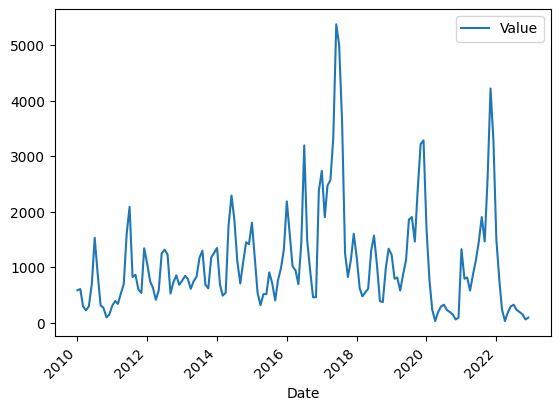

In [58]:
df.plot(x="Date",y="Value")
plt.xticks(rotation=45)

In [13]:
#create model
model = RandomForestRegressor()

In [14]:
#Train the model
X = df[['Value','temperature_2m_mean','rain_sum','windspeed_10m_max']]
X = X[:int(len(df)-1)]
y = df['Value']
y = y[:int(len(df)-1)]
model.fit(X,y)

RandomForestRegressor()

In [15]:
#Test the model
predictions = model.predict(X)
print('model score is',model.score(X,y))

model score is 0.997851446149833


In [37]:
# Make the prediction
new_data = df[['Value','temperature_2m_mean','rain_sum','windspeed_10m_max']].tail(50)
prediction = model.predict(new_data)
print('the model predict the last row or day to be=', prediction)
print('Actiuval value', df[['Value']].tail(50).values[0][0])

the model predict the last row or day to be= [ 975.78 1330.1  1228.46  794.11  813.87  580.61  864.45 1126.18 1863.99
 1893.82 1459.08 2387.05 3233.32 3280.23 1702.11  766.38  234.01   35.36
  190.91  294.78  320.41  230.51  191.07  149.49   60.55   92.42 1323.74
  794.11  813.87  580.61  864.45 1126.18 1462.05 1893.82 1459.08 2567.08
 4054.69 3280.23 1480.11  766.38  234.01   35.36  190.91  294.78  320.41
  230.51  191.07  149.49   60.55   92.42]
Actiuval value 977


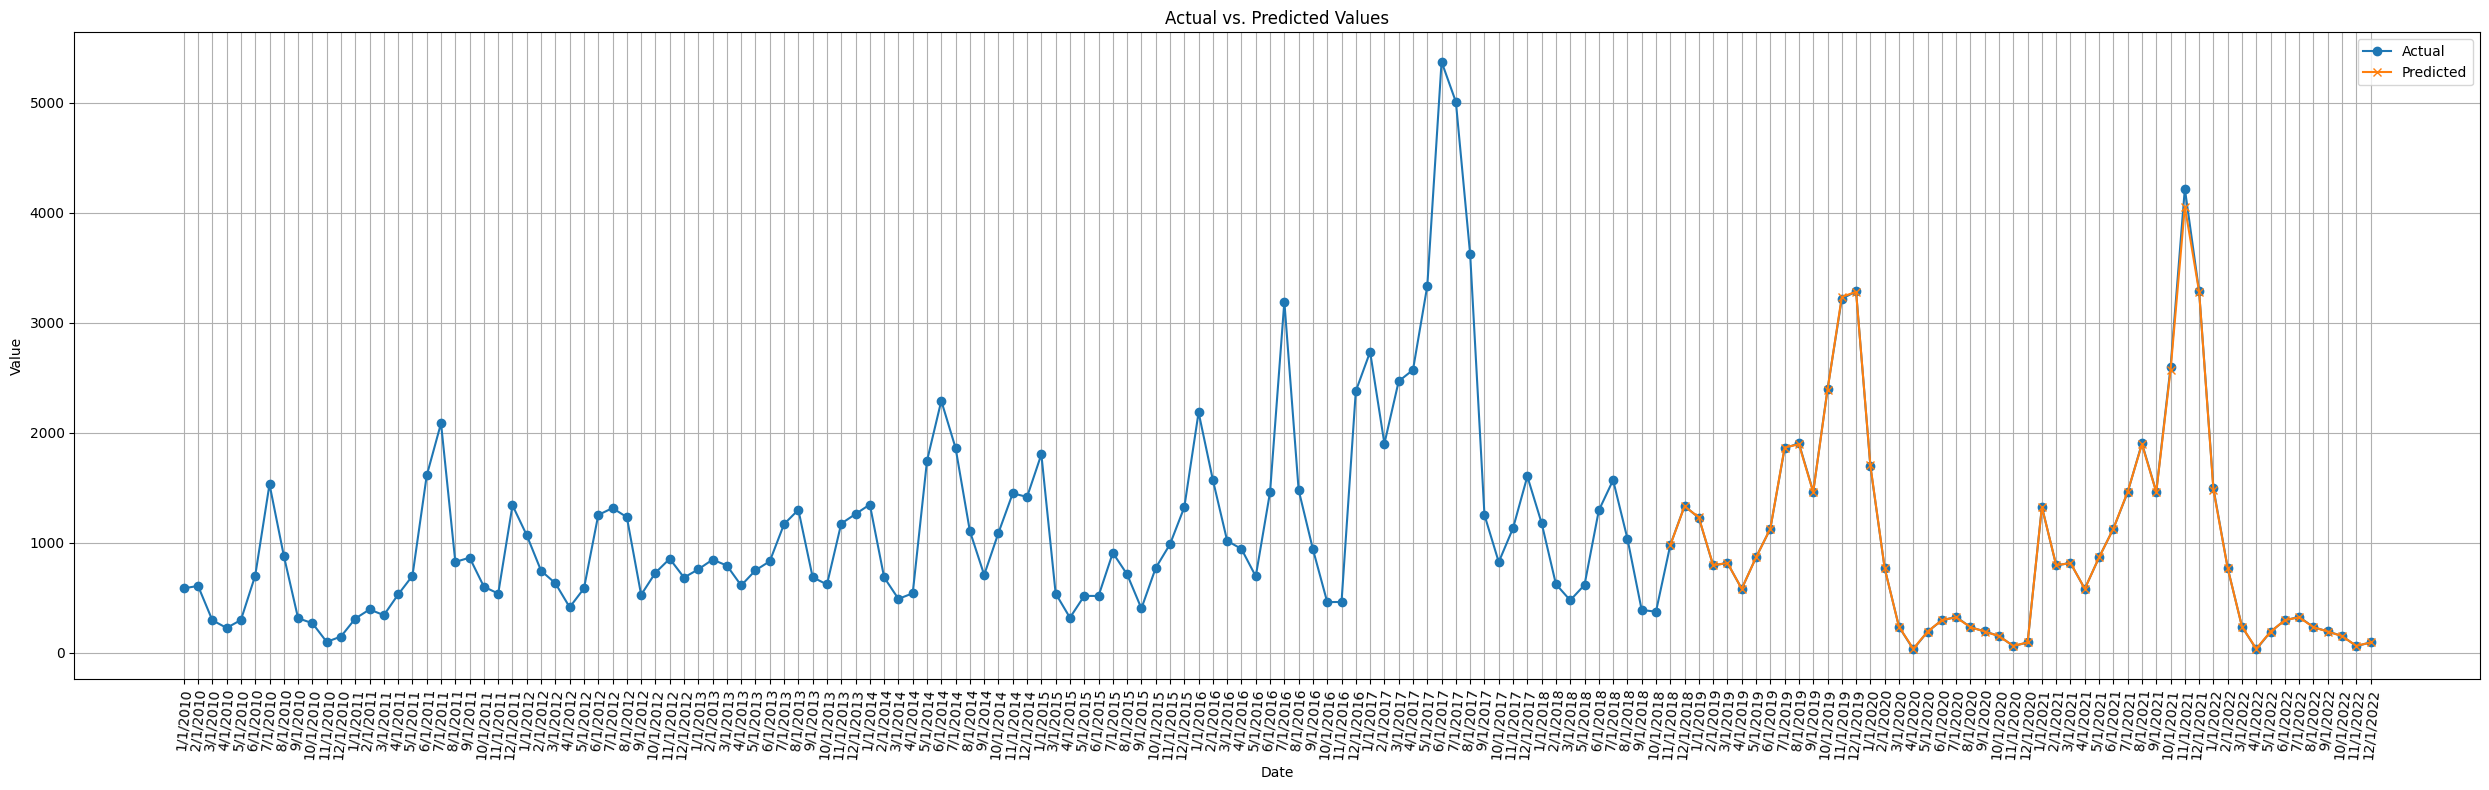

In [38]:
fig, ax = plt.subplots(1, figsize = (25, 8))
ax.grid()
plt.xticks(rotation = 85)

# Plot actual values
plt.plot(df['Date'], df['Value'], label='Actual', marker='o')

# Plot predicted values
plt.plot(df['Date'][-50:], prediction, label='Predicted', marker='x')

plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.title('Actual vs. Predicted Values')

# Rotate x-axis labels for better readability
plt.tight_layout()


plt.show()

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Test the model on the testing set
test_predictions = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, test_predictions)
print('R-squared:', r2)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, test_predictions)
print('Mean Absolute Error (MAE):', mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, test_predictions)
print('Mean Squared Error (MSE):', mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)


R-squared: 0.2299466132752782
Mean Absolute Error (MAE): 478.19376344086015
Mean Squared Error (MSE): 512447.5154071685
Root Mean Squared Error (RMSE): 715.854395395578


Text(0, 0.5, 'Dengue Cases')

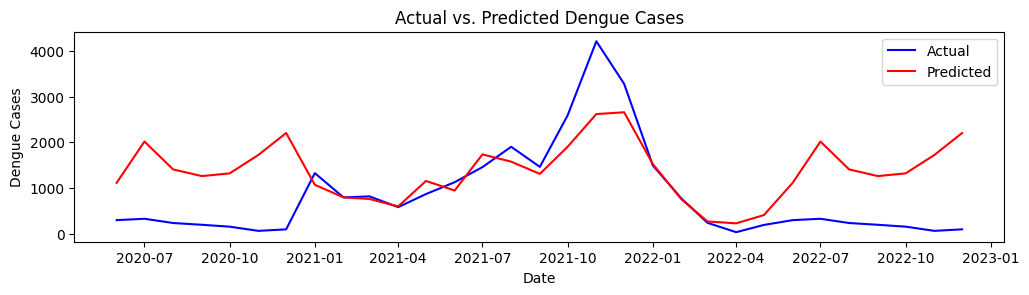

In [62]:

# 2. Split the Data
# You can use a time-based split or other methods.
train_size = int(0.8 * len(df))
train_data = df[:train_size]
test_data = df[train_size:]

# 3. Train a Random Forest Model
X_train = train_data[['temperature_2m_mean', 'rain_sum', 'windspeed_10m_max']]
y_train = train_data['Value']

model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# 4. Make Predictions
X_test = test_data[['temperature_2m_mean', 'rain_sum', 'windspeed_10m_max']]
y_test = test_data['Value']

y_pred = model.predict(X_test)

# 5. Create Graphs
plt.figure(figsize=(12, 6))

# Actual vs. Predicted
plt.subplot(2, 1, 1)
dates_actual = test_data['Date']
plt.plot(dates_actual, y_test, label='Actual', color='blue')
dates_pred = dates_actual[:len(y_pred)]  # Make sure both arrays have the same length
plt.plot(dates_pred, y_pred, label='Predicted', color='red')
plt.legend()
plt.title('Actual vs. Predicted Dengue Cases')
plt.xlabel('Date')
plt.ylabel('Dengue Cases')



In [ ]:
# 60-Day Forecasting
forecast_days = 600
X_forecast = test_data.iloc[-1][['temperature_2m_mean', 'rain_sum', 'windspeed_10m_max']].values.reshape(1, -1)

forecasted_values = []
dates_forecast = [dates_actual.max()]  # Initialize with the last date in the test data
for _ in range(forecast_days):
    forecasted_value = model.predict(X_forecast)
    forecasted_values.append(forecasted_value[0])
    # Update the date for the next day
    next_date = dates_forecast[-1] + pd.Timedelta(days=1)
    dates_forecast.append(next_date)
    # Update the input for the next day
    X_forecast[0, :-1] = X_forecast[0, 1:]
    X_forecast[0, -1] = forecasted_value

plt.subplot(2, 1, 2)
plt.plot(dates_forecast[1:], forecasted_values, label='Forecasted', color='green')
plt.legend()
plt.title('60-Day Dengue Cases Forecast')
plt.xlabel('Date')
plt.ylabel('Dengue Cases')

plt.tight_layout()
plt.show()